# GRUPO 5
Gonzalo de Vicente  
Ana Suárez  
Lucas Viñals  
María Longo  
Paula Piniero 


- # ENUNCIADO
Crea un modelo de Red de Neuronas Convolucionales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
Para ello tendréis que crear un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST, precargado en Keras y que ya habéis utilizado para la práctica 1.
Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles).


**INTRODUCCIÓN** 
 
Una red neuronal es una forma que tiene la IA de enseñar a los ordenadores a procesar datos que trata de emular al cerebro humano.  
Las unidades de procesamiento de las redes neuronales (neuronas) se organizan en capas. Y existen los siguientes tipos de capas:  
1)La capa de entrada.  
2)La capa intermedia.  
3)La capa de salida.

En este caso se trata de un modelo de Red de Neuronas Convolucionales,es decir, un tipo de red la cual debido a que su aplicación es realizada en matrices bidimensionales, son muy eficientes para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras cosas.

El fashion-MNIST es un conjunto de datos consistentes en imágenes con diversas prendas de ropa pertenecientes a artículos de Zalando, que tiene unos 60.000 datos de entrenammiento y 10.000 datos de prueba. Cada una de estas imágenes tiene una dimensión de 28x28 píxeles.  
Las categorías de las imágenes no son números del 0 al 9, sino que en este caso cada número representa una prenda de ropa distinta.
Veáse la clasificación:

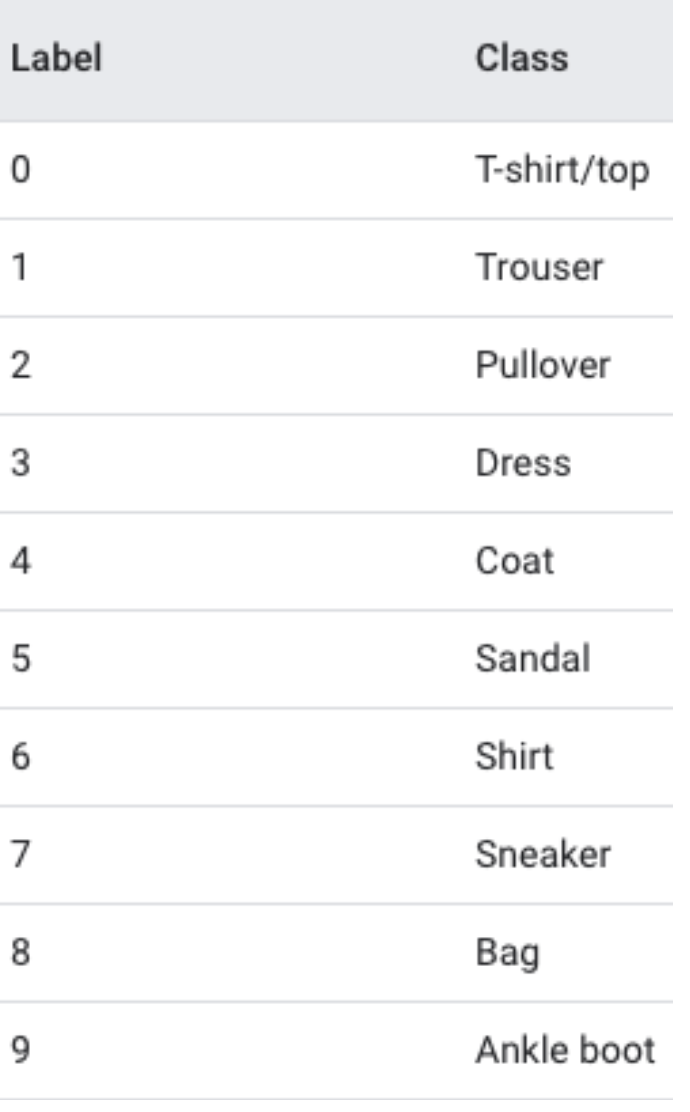



 - # CUESTIONES A TENER EN CUENTA

- Antes de empezar a programar vuestra red neuronal deberéis importar todas las
librerías que vais a requerir.  

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist as moda 
from keras import models
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
import numpy as np
import matplotlib.pyplot as plt
import copy

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


- Aseguraos que estáis ejecutando la versión 2.0.0 (o superior) de TensorFlow en
vuestro Google Colab

In [ ]:
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


-  Cargar los datos de entrenamiento y de Test a partir de
keras.datasets.fashion_mnist

In [ ]:
#Cargamos el conjunto de datos fashion_mnist en Keras, que para que nos sea más facil para trabajar lo llamaremos moda
(train_images, train_labels), (test_images, test_labels) =moda.load_data()

- Es una buena práctica analizar si los datos tienen la forma esperada.

In [ ]:
#veamos el tamaño de nuestros datos de entrenamiento.Son 60k como nos decía el enunciado.
len(train_labels) 

60000

In [ ]:
#Tenemos 60000 imágenes de entranimiento de tamaño 28x28 cada uno. Ese 28x28 lo vamos a aplanar, normalizandolo.
print(train_images.shape)

(60000, 28, 28)


In [ ]:
#veamos el tamaño de nuestros datos de test.Son 10k como nos decía el enunciado.
len(test_labels)

10000

In [ ]:
#Tenemos 10k imágenes de entranimiento del mismo tamaño.
print(test_images.shape)

(10000, 28, 28)


In [ ]:
#Vemos que el elmento 50000 de nuestros datos de entrenamiento pertenece a la categoría 9 = bota.
train_labels[50000]

9

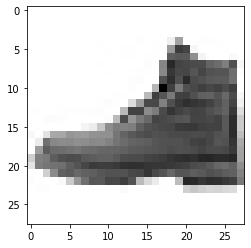

In [ ]:
#Efectivamente,vemos que el elemento 50000 es una bota.
import matplotlib.pyplot as plt
prenda = train_images[50000]
plt.imshow(prenda, cmap=plt.cm.binary)
plt.show()

 - Durante una posible fase de pre procesado de datos, analizar el uso de la
función de keras keras.layers.Flatten().

En una red convolucional no hay que hacer uso de flatten como preprocesado, ya que las imágenes entran directamente como input a la red neuronal y entonces no hace falta aplanar los datos.   
Cabe destacar que flatten se sigue utilizando, pero en la mitad de la red y no al principio, concretamente cuando pasamos de la última capa convolucional a la primera capa densa.

In [ ]:
validation_images = train_images[50001:]
validation_labels = train_labels[50001:]
train_labels=train_labels[:50000]
train_images=train_images[:50000]

# FUNCIONES ÚTILES

In [ ]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

# CUESTIONES PARA IMPLEMENTAR Y RESPONDER.


 # EJERCICIO 1
  Configurar y entrenar los siguientes modelos de red de neuronas
convolucionales, analizando y reflexionando sobre los resultados.

In [ ]:
# Vamos a normalizar los datos para todas las redes
# Concretamente, dividimos entre 255 para que los datos estén en una escala de 0 a 1.
# Y esta escala, se asimila a la de los pesos de la red. Entonces, ambos van a tener una influencia igual en el cálculo de las neuronas.
# Neurona = f(W*X+b): W y X están en la misma escala.
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

**CASO 1**

In [ ]:
model1 = models.Sequential()
model1.add(Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64,(5,5),activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 10)               

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_images, train_labels,  epochs=5, batch_size=50,validation_data=(validation_images,validation_labels))

Epoch 1/5
1000/1000 [==============================] - 4s 3ms/step - loss: 1.0030 - accuracy: 0.6650 - val_loss: 74.4956 - val_accuracy: 0.7477
Epoch 2/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5798 - accuracy: 0.7871 - val_loss: 73.8802 - val_accuracy: 0.7831
Epoch 3/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5046 - accuracy: 0.8204 - val_loss: 68.6670 - val_accuracy: 0.8068
Epoch 4/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4632 - accuracy: 0.8346 - val_loss: 57.8493 - val_accuracy: 0.8240
Epoch 5/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4355 - accuracy: 0.8453 - val_loss: 53.5553 - val_accuracy: 0.8365


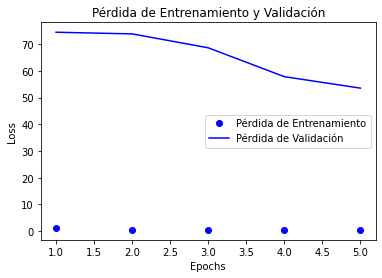

In [ ]:
pinta_perdida_entrenamiento_validacion(history1)


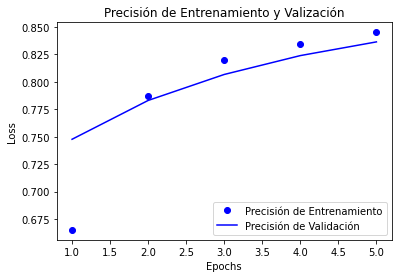

In [ ]:
pinta_precision_entrenamiento_validacion(history1)

Observaciones:
- Las metricas de entrenamiento son mejores que las de validación,pero no hay overfiting.Esto tiene sentido porque son datos con los que hemos entrenado nuestra red vs datos nuevos.

In [ ]:
score = model1.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.4409850537776947 / Test accuracy: 0.8446000218391418


 - En primer lugar, no hay overfitting en esta red convolucional, ya que el accuracy en tanto en el entrenamiento como en el test son muy similares (0.8468 en el entrenamiento VS 0.845 en el test).
 - Vemos que la red aprende en las 5 épocas, empezando con un 0.6748 y llegando hasta 0.85 en la quinta época.  
 - Cabe destacar que con esta primera red neuronal convolucional que hemos creado, hemos sido capaz de igualar la mejor red encontrada en la práctica 1. Esto empieza a evidenciar el potencial de las redes convolucionales al tratar imágenes. 

**CASO 2**

In [ ]:
model2 = models.Sequential()
model2.add(Conv2D(64,(7,7),activation='relu',padding='same',input_shape=(28,28,1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(65, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 6272)              0         
                                                                 
 dense_17 (Dense)            (None, 65)              

Respecto a la primera red, observamos las siguientes diferencias:  
 - El número de parámetros de la primera red es de 62K. En cambio, esta red es de 485K, por lo que debería ser capaz de albergar un mayor conocimiento y llegar a un mayor accuracy. Eso sí, debemos asegurarnos al mismo tiempo que esto no conlleva un sobreajuste.
 - El incremento de estos parámetros se debe sobre todo a una nueva capa densa intermedia entre las capas convolucionales y la capa de salida.
 - En esta red neuronal, hay 64 y 128 filtros en las capas convolucionales frente a los 32 y 64 de la anterior red. 
 - También los kernels tienen una pequeña diferencia,ya que en el primer caso es de 5x5 en ambas capas y en este caso  es de 7x7 en la primera capa y de 3x3 en la segunda capa.  
 

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_images, train_labels,  epochs=5, batch_size=50,validation_data=(validation_images,validation_labels))

Epoch 1/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.9371 - accuracy: 0.6581 - val_loss: 116.7594 - val_accuracy: 0.6843
Epoch 2/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6096 - accuracy: 0.7760 - val_loss: 87.7880 - val_accuracy: 0.7431
Epoch 3/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.5306 - accuracy: 0.8059 - val_loss: 97.7609 - val_accuracy: 0.7589
Epoch 4/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4783 - accuracy: 0.8264 - val_loss: 79.0345 - val_accuracy: 0.7941
Epoch 5/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4382 - accuracy: 0.8409 - val_loss: 79.5236 - val_accuracy: 0.7822


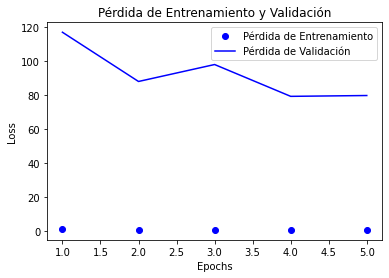

In [ ]:
pinta_perdida_entrenamiento_validacion(history2)

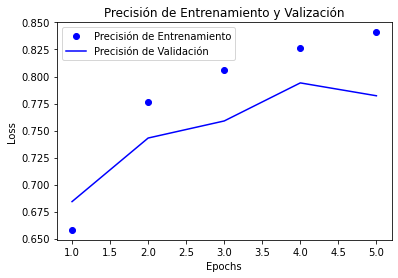

In [ ]:
pinta_precision_entrenamiento_validacion(history2)

Observaciones:
 - En este caso, obtenemos unas gráficas muy parecidas a las del caso 1, por lo que repetimos las observaciones.

In [ ]:
score = model2.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.460324227809906 / Test accuracy: 0.8345999717712402


Conclusiones muy parecidas a las del caso 1. Cabe destacar que a pesar de haber aumentado la complejidad de la red no hemos obtenido ninguna mejora, en el caso 3 probrameros la misma arquitectura pero con otro optimizador, con la esperanza de obtener alguna mejora. 

**CASO 3**

In [ ]:
# El modelo 3 tiene la misma arquitectura que el modelo 2, únicamente cambian sus valores de compilado, 
# por lo que copiamos la arquitectura de esta manera
model3 = copy.deepcopy(model2)

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(train_images, train_labels, epochs=5, batch_size=50,validation_data=(validation_images,validation_labels))

Epoch 1/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4030 - accuracy: 0.8556 - val_loss: 42.8546 - val_accuracy: 0.8718
Epoch 2/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2899 - accuracy: 0.8944 - val_loss: 49.0839 - val_accuracy: 0.8679
Epoch 3/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2517 - accuracy: 0.9075 - val_loss: 38.1023 - val_accuracy: 0.8892
Epoch 4/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2195 - accuracy: 0.9189 - val_loss: 28.5624 - val_accuracy: 0.8867
Epoch 5/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1953 - accuracy: 0.9278 - val_loss: 25.8292 - val_accuracy: 0.8938


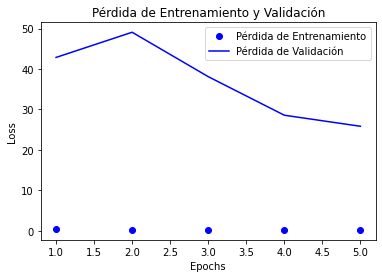

In [ ]:
pinta_perdida_entrenamiento_validacion(history3)

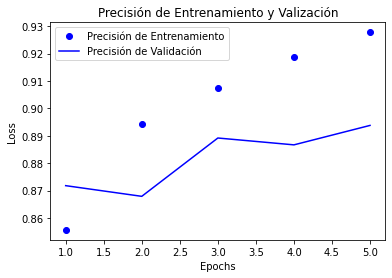

In [ ]:
pinta_precision_entrenamiento_validacion(history3)

Observaciones:
- Sería interesante analizar si la red no ha convergido aún, ya que parece que si le damos más epocas la red seguirá mejorando.





In [ ]:
score = model3.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.2662144899368286 / Test accuracy: 0.9057999849319458


El caso 3 es la mejor red encontrada por el momento.Tenemos las primeras evidencias de que entrenar una red convolucional, con la arquitecura y optimizador debidos,promete un gran rendimiento al procesar imágenes.
 

# EJERCICIO 2

 Explicar la salida de la llamada model.summary() de cada uno de los 3 casos

**CASO 1**

In [ ]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 10)               

In [ ]:
# Número parámetros = (altura kernel*anchura kernel*filtros capa anterior+bias)*filtros capa actual
(5*5*1+1)*32 

832

In [ ]:
# Nos fijamos que las imágenes resultado de la primera capa convolucional son de tamaño 24x24:
# Esto se debe a no aplicar un padding=same, entonces, perdemos 2 filas y columnas a cada lado por usar un kernel de tamaño 5.

In [ ]:
# Número parámetros = (altura kernel*anchura kernel*filtros capa anterior+bias)*filtros capa actual
(5*5*32+1)*64

51264

In [ ]:
# Nos fijamos que las imágenes resultado de la segunda capa convolucional son de tamaño 8x8:
# Esto se debe a que las imágenes de entrada eran de tamaño 12x12 tras el pooling, de nuevo no aplicamos
# un padding=same, entonces perdemos 2 filas y columnas a cada lado por usar un kernel de tamaño 5.

In [ ]:
# El número de neuronas que entran a la última capa, lo obtenemos tras realizar el flatten:64*4*4.
# Cada neurona de entrada se conecta con una de salida por ser una capa densa, que teniendo en cuenta los sesgos, 
# los parámetros totales son: 
64*4*4*10+10

10250

 **CASO 2 y 3**

In [ ]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 6272)              0         
                                                                 
 dense_17 (Dense)            (None, 65)              

In [ ]:
# Número parámetros = (altura kernel*anchura kernel*filtros capa anterior+bias)*filtros capa actual
(7*7*1+1)*64

3200

In [ ]:
# Nos fijamos que las imágenes resultado de la primera capa convolucional son de tamaño 28x28:
# Esto se debe a aplicar un padding=same, por lo que no perdemos ninguna fila.

In [ ]:
# Número parámetros = (altura kernel*anchura kernel*filtros capa anterior+bias)*filtros capa actual
(3*3*64+1)*128

73856

In [ ]:
# Nos fijamos que las imágenes resultado de la segunda capa convolucional son de tamaño 14x14:
# Esto se debe a que las imágenes de entrada eran de tamaño 14x14 tras el pooling, de nuevo aplicamos
# un padding=same, por lo que no perdemos ninguna fia.

In [ ]:
# El número de neuronas que entran a la última capa, lo obtenemos tras realizar el flatten:128*7*7.
# Cada neurona de entrada se conecta con una de salida por ser una capa densa, que teniendo en cuenta los sesgos, 
# los parámetros totales son: 
128*7*7*65+65

407745

In [ ]:
# Usamos una segunda capa dense:
65*10+10

660

# EJERCICIO 3
Analizar e interpretar los resultados del caso 1 frente a su original si se
multiplica por 5 las épocas de entrenamiento (25)

In [ ]:
model1_25_epochs = copy.deepcopy(model1)
history1_25= model1_25_epochs.fit(train_images, train_labels,  epochs=25, batch_size=50,validation_data=(validation_images,validation_labels))

Epoch 1/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4152 - accuracy: 0.8523 - val_loss: 66.4974 - val_accuracy: 0.8195
Epoch 2/25
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3985 - accuracy: 0.8588 - val_loss: 51.2310 - val_accuracy: 0.8438
Epoch 3/25
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3850 - accuracy: 0.8624 - val_loss: 50.6875 - val_accuracy: 0.8480
Epoch 4/25
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3750 - accuracy: 0.8669 - val_loss: 56.0263 - val_accuracy: 0.8469
Epoch 5/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3656 - accuracy: 0.8710 - val_loss: 48.5169 - val_accuracy: 0.8529
Epoch 6/25
1000/1000 [==============================] - 6s 6ms/step - loss: 0.3560 - accuracy: 0.8735 - val_loss: 51.1305 - val_accuracy: 0.8537
Epoch 7/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3481 - accuracy: 0.8752 - val_loss: 58.6150 - val_ac

In [ ]:
pinta_perdida_entrenamiento_validacion(history1_25)

In [ ]:
pinta_precision_entrenamiento_validacion(history1_25)

Observaciones:
- En este caso caso al multiplicar las épocas hasta 25 se produce un sobreajuste ya que,la precisión de validación está como estancada mientras que la precisión de entramiento va mejorando.

In [ ]:
score = model1_25_epochs.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

El sobreajuste también se puede ver aqui,ya que, la accuracy es de 0.89 en las imágenes de entrenamiento frente a casi 0.94, en las imágenes de test.
El overfitting hace que acierte menos en el test que en el entrenamiento


 # EJERCICIO 4
  Analiza el resultado del caso 1 si en lugar de ReLU usas tanh en la función de
activación de las dos capas convolucionales.

In [ ]:
model1_tanh = models.Sequential()
model1_tanh.add(Conv2D(32,(5,5),activation='tanh',input_shape=(28,28,1)))
model1_tanh.add(MaxPooling2D((2, 2)))
model1_tanh.add(Conv2D(64,(5,5),activation='tanh'))
model1_tanh.add(MaxPooling2D((2, 2)))
model1_tanh.add(Flatten())
model1_tanh.add(Dense(10, activation='softmax'))
model1_tanh.summary()

In [ ]:
model1_tanh.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model1_tanh.fit(train_images, train_labels,  epochs=5, batch_size=50,validation_data=(validation_images,validation_labels))

Como vemos aquí, las redes neuronales aprenden de forma similar al modelo 1 con la función de activación relu.

In [ ]:
score = model1_tanh.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
score = model1.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

En este caso,acierta peor este modelo con una funcion de activación tangente hiperbólica que el modelo 1 con la funcion de activación Relu.

 # EJERCICIO 5
 Evaluar cada uno de los 3 modelos comparando el rendimiento del modelo en
el conjunto de datos de prueba

**CASO 1**
 

In [ ]:
score = model1.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Como ya hemos dicho antes:
 - En primer lugar, no hay overfitting en esta red convolucional, ya que el accuracy en tanto en el entrenamiento como en el test son muy similares (0.8468 en el entrenamiento VS 0.845 en el test)  
 - Cabe destacar que con esta primera red neuronal convolucional que hemos creado, hemos sido capaz de igualar la mejor red encontrada en la práctica 1. Esto empieza a evidenciar el potencial de las redes convolucionales al tratar imágenes. 

**CASO 2**

In [ ]:
score = model2.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

En el caso 2, podemos observar una pequeña mejora respecto al caso 1, debido a que el modelo es más complejo y puede almacenar más conocimiento,si somos capaces de entrenar el sobreajuste.
Sin embargo, la mejora es muy pequeña.

**CASO 3**

In [ ]:
score = model3.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

En este último caso, vemos que la red ha mejorado significativamente.

# EJERCICIO 6

 Usar cada uno de los 3 modelos para hacer predicciones sobre la 6ª imagen de 
test (test_images[5])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')

In [ ]:
Y_pred1=model1.predict(test_images)
Y_pred1[5]


In [ ]:
for model in [model1, model2, model3]:
  predictions = model.predict(test_images)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions[5],  test_labels)
  plt.show()
  plt.clf()

Como vemos aquí, la red acierta en todos los casos. Es decir, predice los pantalones con un 100% de exactitud con todos los modelos.

# EJERCICIO 7

Utilice el siguiente código para graficar cómo de bien o de mal se comporta el 
modelo para cada uno de los 3 casos con las 14 primeras imágenes del 
conjunto de test. Reflexione y comente las diferencias que observa.

In [ ]:
Y_pred1=model1.predict(test_images)
for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, Y_pred1[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, Y_pred1[i], test_labels)
  plt.show()

In [ ]:
Y_pred2=model2.predict(test_images)
for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, Y_pred2[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, Y_pred2[i], test_labels)
  plt.show()

In [ ]:
Y_pred3=model3.predict(test_images)
for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, Y_pred3[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, Y_pred3[i], test_labels)
  plt.show()

En el caso 1, tiene más dudas al identificar algunas prendas, asi como la prenda 5,las deportivas y la prenda 6, las camisas.
Sin embargo en los otros dos casos identifica las prendas con mucha mejor precisión.

# EJERCICIO 8 

Hacer comparativa con los resultados que obtuvisteis en la práctica 1, con las capas Dense.

Estos  son los resultados obtenidos en la práctica anterior con redes con capas densas.
- CASO 1: accuracy: 0.7937
- CASO 2: accuracy: 0.8352
- CASO 3: accuracy: 0.6627
- CASO 4: accuracy: 0.8235
- CASO 5: accuracy: 0.8228
- CASO 6: accuracy: 0.8694
- CASO 7: accuracy: 0.7502
- CASO 8: accuracy: 0.8687

Y los casos obtenidos en esta practica con redes convolucionales:
- CASO 1: accuracy:0.8924999833106995
- CASO 2: accuracy:0.845300018787384
- CASO 3: accuracy:0.9077000021934509


- Las redes convolucionales son mejores para identificar imágenes que las redes normales con capas densas.El mejor caso de nuestra red convolucional, obtenemos un accuracy de 0.908 mientras que en el mejor de los casos de nuestra red normal con capas densas es  0.8694.
- La peor red convulcional,tiene un accuracy de 0.845 que funciona casi a la par que la mejor red normal. 



# EJERCICIO 9 

Ver los conceptos de batch_normalization y dropout y ver si se podría mejorar el modelo con ello.

 - Batch normalization:

In [ ]:
model3_batch = models.Sequential()
model3_batch.add(Conv2D(64,(7,7),activation='relu',padding='same',input_shape=(28,28,1)))
model3_batch.add(BatchNormalization())
model3_batch.add(MaxPooling2D((2, 2)))
model3_batch.add(BatchNormalization())
model3_batch.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model3_batch.add(MaxPooling2D((2, 2)))
model3_batch.add(Flatten())
model3_batch.add(Dense(65, activation='relu'))
model3_batch.add(Dense(10, activation='softmax'))
model3_batch.summary()

In [ ]:
history3_batch = model3.fit(train_images, train_labels, epochs=5, batch_size=50,validation_data=(validation_images,validation_labels))
score = model3.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Como vemos aquí, la accuracy ha mejorado ligeramente con el batch (ahora es 0.914).

- Dropout:

In [ ]:
for i in [0.01, 0.04, 0.07, 0.1, 0.25, 0.5]:
  print("Dropout: ", i)
  model3_dropout = copy.deepcopy(model3)
  model3_dropout.add(Dropout(i))
  model3.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
  history3 = model3.fit(train_images, train_labels, epochs=5, batch_size=50,validation_data=(validation_images,validation_labels))
  score = model3.evaluate(test_images, test_labels, verbose=0)
  print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


# EJERCICIO 10

Ver los conceptos de callbacks (Decaimiento del ratio de aprendizaje) y ver si se podría mejorar el modelo con ello.

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history3_callbacks = model3.fit(train_images, train_labels, epochs=10, batch_size=50,validation_data=(validation_images,validation_labels), callbacks=my_callbacks)
score = model3.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Le hemos dado al modelo 10 épocas y ha parado en la época 5.  

Cuando ha detectado que ya ha convergido el entrenamiento, concretamente 2 épocas sin mejorar, para de entrenar para evitar el sobreajuste aunque le queden más épocas. 

Esto se conoce como early stopping.


**¿CÓMO HEMOS AFRONTADO LA PRÁCTICA?**

Para empezar a realizar nuestra práctica, primeramente ,realizamos las cuestiones a tener en cuenta,de las cuales se encargaron Paula,Lucas y María.  

A continuación,Ana y Gonzalo, configuraron y entrenaron los distintos 3 casos de modelos de red de neuronas convolucionales,analizando y reflexionando sobre los resultados, en cual sacaron la conclusión de que el mejor de los casos es el caso 3, ya que es el que mejor aprende.  

Posteriormente,al explicar la salida de la llamada model.summary(), encontraron alguna dificultad ya que las redes convolucionales funcionan de forma diferente que las redes de neuronas densas.  

En los ejercicios 3,4,5,6,7 y 8, Ana y Gonzalo, no se encontraron con ningún tipo de dificultad y se sacaron las conclusiones mencionadas en el ejercicio.
En el ejercicio 9, se encontraron con la dificultad de que al asignar a otra variable los modelos se asignaban punteros a esas variables, por lo que hemos tenido que usar la función deepcopy para copiar los modelos en diferentes ejercicios de la práctica.  

En el ejercicio 10, Ana y Gonzalo tuvieron la dificultad en el código, ya que no sabían muy bien como emplearlo, pero finalmente dieron con ello, se concluyó con este ejercicio que con el callbacks la red se paraba cuando había sobreentrenamiento.

**CONCLUSIÓN**

Tras realizar los tres distintos casos,con las redes convolucionales, concluimos que la mejor red neuronal es la del caso 3: usando  una red convolucional, con el  optimizador adam, obtenemos el mejor rendimiento de todos los modelos al procesar imágenes.  

Al analizar e interpretar los resultados del caso 1 frente a su original si se multiplica por 5 las épocas de entrenamiento y se concluye que en caso 1 al multiplicar las épocas hasta 25 se produce un sobreajuste ya que,la precisión de validación está como estancada mientras que la precisión de entramiento va mejorando. Esto se debe a que la red neuronal ya ha convergido. 

Para analizar el resultado del caso 1, en vez de usar la función de activación relu, se usó, como pedía el enunciado, la función de activación tanh. Analizando los resultados, se puede concluir que con la función de activación tanh, la red funciona peor.

Al evaluar cada uno de los tres modelos comparando el rendimiento en el conjunto de datos de prueba, vemos que la red mejora significativamente en el caso 3.

Al hacer los gráficos de como de bien o mal aprende cada modelo para cada uno de los tres casos, con las 14 primeras imágenes, vemos que en el caso 1, identifica peor algunas prendas, así como la 5 (deportivas) y la 6 (camisas), y también observamos que los dos últimos casos las redes identifican las prendas de ropa a la perfección.

Tras realizar la comparativa de los resultados de la práctica 1 y los obtenidos en esta práctica, concluimos que las redes convolucionales son mejores para identificar imágenes que las redes con capas densas.

Finalmente, en el ejercicio 10 se concluye que con callbacks, cuando detecta que ya ha convergido el entrenamiento, concretamente 2 épocas sin mejorar, para de entrenar para evitar el sobreajuste aunque le queden más epocas.  

Esto se conoce como early stopping.